# Credit Card Fraud Detection Project

This project focuses on developing binary classification models to detect fraudulent credit card transactions. The analysis is structured in the following sections:

1. Exploratory Data Analysis (EDA) - Understanding patterns and relationships in transaction data
2. Model Implementation:
   - Logistic Regression
   - K-Nearest Neighbors
   - Support Vector Machine (SVM) 
   - Deep Learning Model

3. Feature Reduction Analysis - Comparing model performance before and after dimensionality reduction

The goal is to identify the most effective approach for detecting fraudulent transactions while maintaining high accuracy and minimizing false positives.



In [19]:
import numpy as np
import pandas as pd

## Exploratory Data Analysis (EDA)



This exploratory data analysis aims to understand the characteristics of the fraud detection dataset. By analyzing various aspects of the data, we can uncover patterns and insights that will aid in building an effective predictive model to identify fraudulent transactions.


## Data Overview

- **Dataset:** `fraud_test.csv`
- **Number of Records:** 93,34 (as indicated by the output)
- **Number of Features:** 22
- **Some of the Features Description:**
  - `trans_date_trans_time`: Date and time of the transaction.
  - `cc_num`: Credit card number.
  - `merchant`: Merchant name where the transaction took place.
  - `category`: Category of the merchant.
  - `am`: Amount of the transaction.
  - `state`: State where the transaction occurred.
  - `zip`: ZIP code of the transaction location.
  - `lat`: Latitude of the merchant location.
  - `long`: Longitude of the merchant location.
  - `job`: Job title of the cardholder.
  - `dob`: Date of birth of the cardholder.
  - `trans_num`: Transaction number.
  - `unix_time`: Unix timestamp of the transaction.
  - `merch_lat`: Merchant latitude.
  - `merch_long`: Merchant longitude.
  - `is_fraud`: Target variable indicating fraudulent transactions.


In [20]:
data = pd.read_csv("data/fraud_test.csv")
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
# data = pd.read_csv("path_to_your_data.csv")

# Preprocessing: Convert date/time columns to numerical format or drop them
for column in data.columns:
    # Check if column is datetime-like
    if pd.api.types.is_datetime64_any_dtype(data[column]):
        data[column] = data[column].astype(int)  # Convert datetime to numerical (timestamp)
    elif pd.api.types.is_object_dtype(data[column]):
        # Encode categorical text columns
        encoder = LabelEncoder()
        data[column] = encoder.fit_transform(data[column])

# Check for missing values and handle them
data = data.fillna(0)










In [22]:
# Overview of the dataset
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  int64  
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  int64  
 3   category               555719 non-null  int64  
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  int64  
 6   last                   555719 non-null  int64  
 7   gender                 555719 non-null  int64  
 8   street                 555719 non-null  int64  
 9   city                   555719 non-null  int64  
 10  state                  555719 non-null  int64  
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [23]:
print(data.isnull().sum())


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


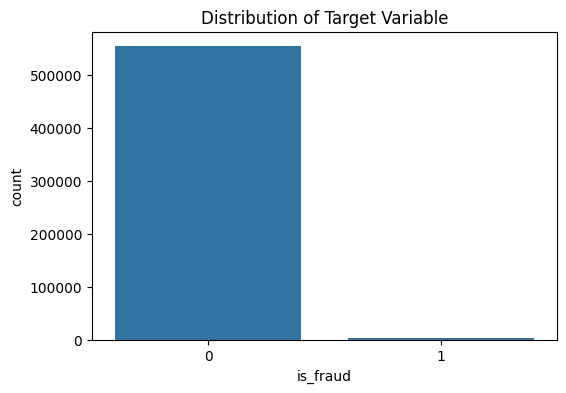

Number of fraudulent transactions (is_fraud = 1): 2145
Number of non-fraudulent transactions (is_fraud = 0): 553574


In [24]:
# Visualization 1: Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=data)  # Assuming the target column is named 'target'
plt.title('Distribution of Target Variable')
plt.show()
print("Number of fraudulent transactions (is_fraud = 1):", data['is_fraud'].value_counts().get(1, 0))
print("Number of non-fraudulent transactions (is_fraud = 0):", data['is_fraud'].value_counts().get(0, 0))



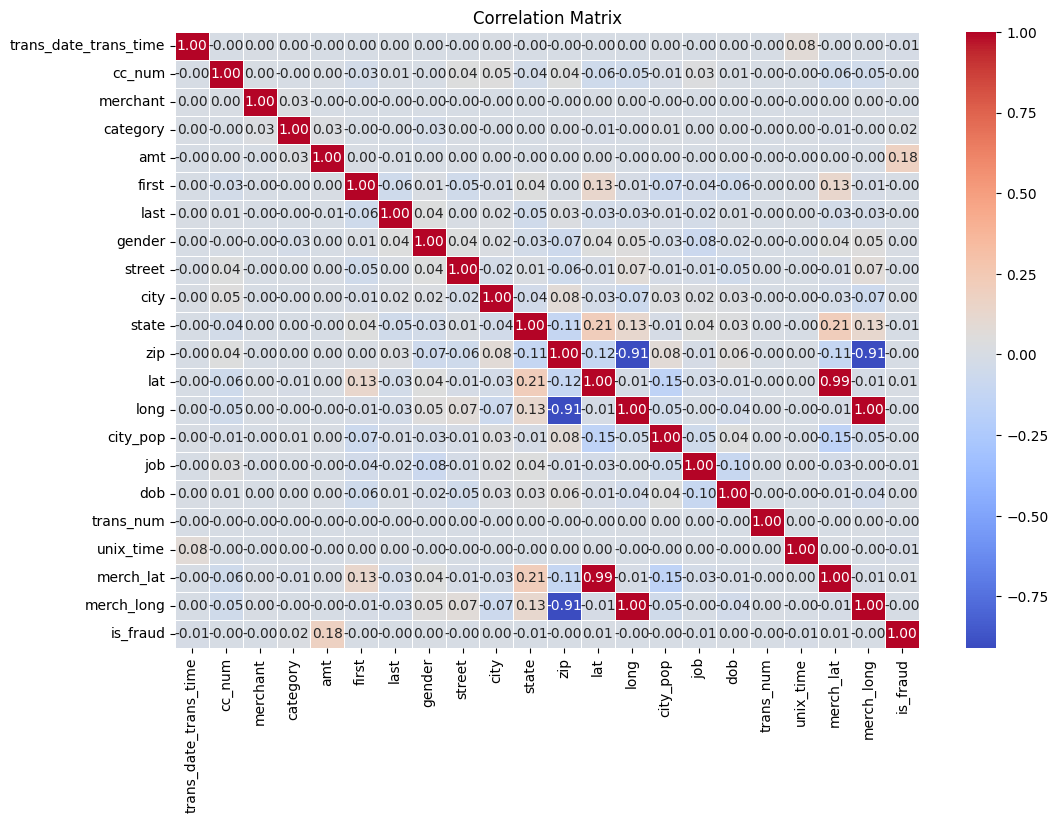

In [25]:
# Visualization 2: Correlation matrix heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Split data into fraudulent and legitimate transactions
legit = data[data.is_fraud == 0]    # All legitimate transactions (553,574 rows)
fraud = data[data.is_fraud == 1]    # All fraudulent transactions (2,145 rows)

# Randomly sample legitimate transactions to match fraud count
legit_sample = legit.sample(n=2145)  # Random sample of 2,145 legitimate transactions

# Combine balanced datasets
newdata = pd.concat([legit_sample, fraud], axis=0)  # Now has 4,290 total rows (2,145 each)

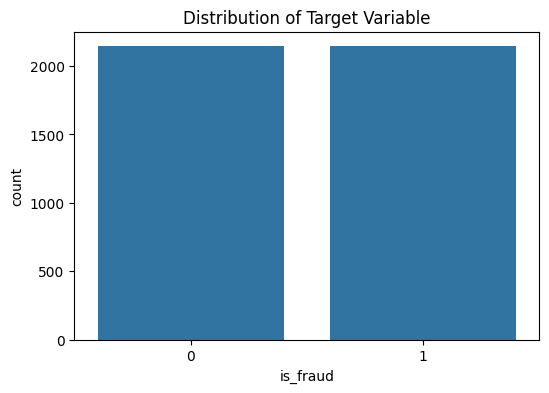

Number of fraudulent transactions (is_fraud = 1): 2145
Number of non-fraudulent transactions (is_fraud = 0): 2145


In [44]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=newdata)  # Assuming the target column is named 'target'
plt.title('Distribution of Target Variable')
plt.show()
print("Number of fraudulent transactions (is_fraud = 1):", newdata['is_fraud'].value_counts().get(1, 0))
print("Number of non-fraudulent transactions (is_fraud = 0):", newdata['is_fraud'].value_counts().get(0, 0))

In [27]:
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', None)
X = newdata.drop('is_fraud', axis=1)
y = newdata['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Count of non-fraudulent transactions (is_fraud = 0):", y_train.value_counts().get(0, 0))
print("Count of fraudulent transactions (is_fraud = 1):", y_train.value_counts().get(1, 0))




Count of non-fraudulent transactions (is_fraud = 0): 1693
Count of fraudulent transactions (is_fraud = 1): 1739


### Logistic Regression: A Linear Algebra Perspective

1. **Linear Model**: Logistic regression computes \( z = \mathbf{w}^\top \mathbf{x} + b \), where:
   - \( \mathbf{w} \) is the weight vector (parameters),
   - \( \mathbf{x} \) is the input feature vector,
   - \( b \) is the bias term.

2. **Sigmoid Activation**: The logistic function maps \( z \) to a probability:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

3. **Cost Function**: The binary cross-entropy loss quantifies prediction errors:
   $$
   J(\mathbf{w}, b) = -\frac{1}{m} \sum_{i=1}^m \left[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right]
   $$
   where \( \hat{y}_i = \sigma(\mathbf{w}^\top \mathbf{x}_i + b) \).

4. **Gradient Descent**:
   - Compute gradients:
     $$
     \nabla_{\mathbf{w}} = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i) \mathbf{x}_i, \quad \nabla_b = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i)
     $$
   - Update parameters:
     $$
     \mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{\mathbf{w}}, \quad b \leftarrow b - \alpha \nabla_b
     $$

5. **Matrix Form**:
   - For batch computations:
     $$
     \mathbf{Z} = \mathbf{X} \mathbf{w} + \mathbf{b}, \quad \hat{\mathbf{Y}} = \sigma(\mathbf{Z})
     $$



In [28]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Step 2: Define the logistic regression class
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=100000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """Apply sigmoid function."""
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """Train the logistic regression model."""
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights
        self.bias = 0                       # Initialize bias

        # Gradient descent
        for _ in range(self.epochs):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            # Apply sigmoid to get predictions
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """Make predictions."""
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        # Convert probabilities to binary output (0 or 1)
        y_predicted_binary = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_binary)

# Step 3: Train and evaluate the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("count of fraudulent transactions (is_fraud = 1):", np.sum(y_pred == 1))
print("count of fraudulent transactions (is_fraud = 1):", np.sum(y_pred == 0))
print("count of fraudulent transactions (is_fraud = 1) in the test set:", y_test.value_counts().get(1, 0))
print("count of non-fraudulent transactions (is_fraud = 0) in the test set:", y_test.value_counts().get(0, 0))
# Step 4: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

count of fraudulent transactions (is_fraud = 1): 343
count of fraudulent transactions (is_fraud = 1): 515
count of fraudulent transactions (is_fraud = 1) in the test set: 406
count of non-fraudulent transactions (is_fraud = 0) in the test set: 452
Model Performance:
Accuracy: 0.86
Precision: 0.91
Recall: 0.77
F1-Score: 0.84


In [29]:
import numpy as np
from collections import Counter

class KNearestNeighborsScratch:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        """
        Store the training data and labels.
        """
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
    
    def predict(self, X_test):
        """
        Predict the class for each test instance.
        """
        X_test = np.array(X_test)
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)
    
    def _predict(self, x):
        """
        Predict the class for a single instance.
        """
        # Compute Euclidean distances
        distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
        # Find the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

### k-Nearest Neighbors (k-NN): A Linear Algebra Perspective

1. **Overview**: 
   - k-NN is a non-parametric algorithm that classifies a data point based on the majority class among its \( k \)-nearest neighbors.
   - It relies on distance metrics to determine neighbors.

2. **Distance Calculation**:
   - The most common metric is the Euclidean distance:
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{k=1}^n \left( x_{i,k} - x_{j,k} \right)^2}
     $$
   - In vector form:
     $$
     d(\mathbf{x}_i, \mathbf{x}_j) = \|\mathbf{x}_i - \mathbf{x}_j\|_2
     $$
   - Other metrics like Manhattan or cosine similarity can also be used.

3. **Algorithm Steps**:
   - Compute distances from the input point \( \mathbf{x} \) to all points in the dataset:
     $$
     D = \|\mathbf{X} - \mathbf{x}\|_2
     $$
     where \( \mathbf{X} \) is the matrix of all training points.
   - Sort the distances to find the \( k \)-nearest neighbors.
   - Determine the majority class among the neighbors.

4. **Linear Algebra Connection**:
   - **Matrix Representation**: Distance computation can be vectorized for efficiency. For all points:
     $$
     \|\mathbf{X} - \mathbf{x}\|_2 = \sqrt{\text{diag}(\mathbf{X} \mathbf{X}^\top) - 2\mathbf{X} \mathbf{x} + \|\mathbf{x}\|_2^2}
     $$
   - **Efficient Search**: Techniques like KD-trees or ball-trees leverage geometric properties to reduce complexity in high dimensions.

5. **Prediction**:
   - Assign the class based on a majority vote among the \( k \)-nearest neighbors.



In [30]:

k_values = [1, 3, 5, 7, 9]  # Different values of k to loop through
for k in k_values:
    knn = KNearestNeighborsScratch(k=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Model Performance for k={}:".format(k))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")



Model Performance for k=1:
Accuracy: 0.86
Precision: 0.80
Recall: 0.95
F1-Score: 0.87
Model Performance for k=3:
Accuracy: 0.86
Precision: 0.80
Recall: 0.95
F1-Score: 0.86
Model Performance for k=5:
Accuracy: 0.84
Precision: 0.77
Recall: 0.94
F1-Score: 0.85
Model Performance for k=7:
Accuracy: 0.83
Precision: 0.76
Recall: 0.94
F1-Score: 0.84
Model Performance for k=9:
Accuracy: 0.82
Precision: 0.75
Recall: 0.93
F1-Score: 0.83


### Support Vector Machine (SVM): A Linear Algebra Perspective

1. **Overview**:
   - SVM is a supervised learning algorithm that finds the hyperplane that best separates data into two classes.
   - It aims to maximize the margin, the distance between the hyperplane and the nearest data points (support vectors).

2. **Decision Boundary**:
   - The decision boundary is a hyperplane defined as:
     $$
     \mathbf{w}^\top \mathbf{x} + b = 0
     $$
     where:
     - \( \mathbf{w} \): Weight vector, normal to the hyperplane.
     - \( b \): Bias term.
     - \( \mathbf{x} \): Input feature vector.

3. **Optimization Objective**:
   - SVM maximizes the margin \( \frac{2}{\|\mathbf{w}\|} \), which leads to minimizing \( \|\mathbf{w}\|^2 \).
   - The optimization problem is:
     $$
     \min_{\mathbf{w}, b} \frac{1}{2} \|\mathbf{w}\|^2
     $$
     Subject to:
     $$
     y_i (\mathbf{w}^\top \mathbf{x}_i + b) \geq 1 \quad \forall i
     $$

4. **Lagrange Dual Form**:
   - The primal problem is converted to the dual form using Lagrange multipliers \( \alpha_i \):
     $$
     \max_{\alpha} \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y_i y_j (\mathbf{x}_i^\top \mathbf{x}_j)
     $$
     Subject to:
     $$
     \sum_{i=1}^m \alpha_i y_i = 0, \quad 0 \leq \alpha_i \leq C
     $$
   - This involves the **kernel trick** for non-linear decision boundaries.

5. **Linear Algebra Connection**:
   - **Support Vectors**: The model depends only on support vectors (points where \( \alpha_i > 0 \)).
   - **Kernel Function**: Inner products \( \mathbf{x}_i^\top \mathbf{x}_j \) are replaced with kernel functions \( K(\mathbf{x}_i, \mathbf{x}_j) \), enabling computations in high-dimensional spaces without explicitly mapping the data.
   - **Matrix Operations**: The optimization involves quadratic programming, often expressed in terms of matrices.

6. **Prediction**:
   - For a new input \( \mathbf{x} \), the decision function is:
     $$
     f(\mathbf{x}) = \sum_{i=1}^m \alpha_i y_i K(\mathbf{x}_i, \mathbf{x}) + b
     $$
   - The class is determined by the sign of \( f(\mathbf{x}) \).



In [31]:
class SVM:
    def __init__(self, learning_rate=0.0001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)



In [32]:
svm = SVM(learning_rate=0.1, lambda_param=0.001, n_iters=1000)
svm.fit(X_train, y_train)

# Predictions
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-Score: {f1:.2f}")


Model Performance:
Accuracy: 0.37


In [33]:
print(X_train.shape)
print(y_train.shape)

(3432, 21)
(3432,)


In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.values)

# Create dataset and dataloader
train_size = int(0.9 * len(X_train_tensor))
val_size = len(X_train_tensor) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(
    TensorDataset(X_train_tensor, y_train_tensor), 
    [train_size, val_size]
)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Define model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(21, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 2),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += batch_y.size(0)
            correct += (predicted == batch_y).sum().item()
    
    print(f'Epoch {epoch+1}, Val Loss: {val_loss/len(val_loader):.4f}, Val Acc: {100*correct/total:.2f}%')

# Make predictions on test set
X_test_tensor = torch.FloatTensor(X_test)
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predictions = torch.max(test_outputs.data, 1)
    y_pred = predictions.numpy()

Epoch 1, Val Loss: 0.6714, Val Acc: 68.02%
Epoch 2, Val Loss: 0.6077, Val Acc: 74.71%
Epoch 3, Val Loss: 0.5504, Val Acc: 78.49%
Epoch 4, Val Loss: 0.5291, Val Acc: 79.94%
Epoch 5, Val Loss: 0.5167, Val Acc: 80.81%
Epoch 6, Val Loss: 0.5108, Val Acc: 81.10%
Epoch 7, Val Loss: 0.5060, Val Acc: 81.10%
Epoch 8, Val Loss: 0.5039, Val Acc: 81.10%
Epoch 9, Val Loss: 0.5035, Val Acc: 81.40%
Epoch 10, Val Loss: 0.4999, Val Acc: 81.40%
Epoch 11, Val Loss: 0.4994, Val Acc: 81.10%
Epoch 12, Val Loss: 0.4985, Val Acc: 81.69%
Epoch 13, Val Loss: 0.4977, Val Acc: 81.69%
Epoch 14, Val Loss: 0.4965, Val Acc: 81.98%
Epoch 15, Val Loss: 0.4959, Val Acc: 81.98%
Epoch 16, Val Loss: 0.4959, Val Acc: 81.98%
Epoch 17, Val Loss: 0.4953, Val Acc: 81.98%
Epoch 18, Val Loss: 0.4928, Val Acc: 81.69%
Epoch 19, Val Loss: 0.4927, Val Acc: 81.98%
Epoch 20, Val Loss: 0.4933, Val Acc: 81.98%
Epoch 21, Val Loss: 0.4929, Val Acc: 81.98%
Epoch 22, Val Loss: 0.4907, Val Acc: 82.27%
Epoch 23, Val Loss: 0.4898, Val Acc: 81.9

Optimal number of components: 17


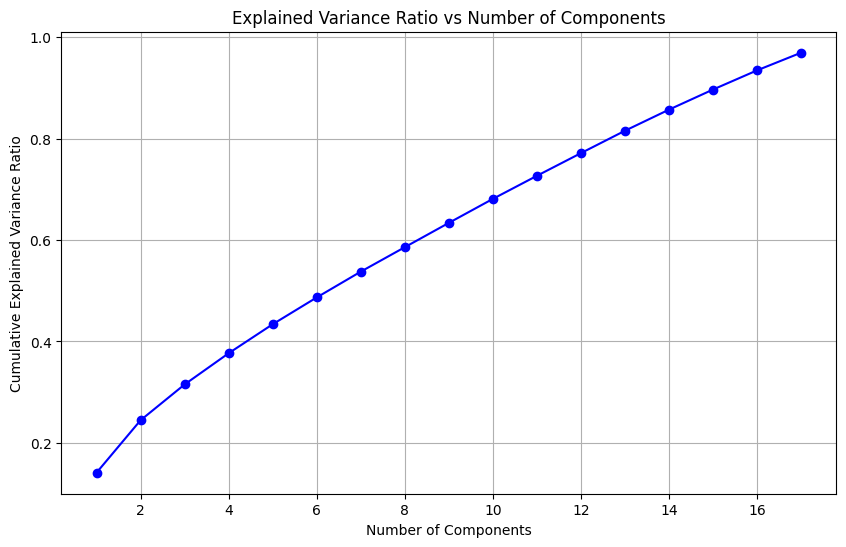

Original feature dimension: 21
Reduced feature dimension: 17
Total explained variance ratio: 0.9692


In [43]:
# Implement PCA from scratch
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Calculate covariance matrix
        cov_matrix = np.cov(X_centered.T)
        
        # Calculate eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvalues and eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Store first n_components eigenvectors
        self.components = eigenvectors[:, :self.n_components]
        
        return self
        
    def transform(self, X):
        # Center the data using mean from fit
        X_centered = X - self.mean
        
        # Project data onto principal components
        X_transformed = np.dot(X_centered, self.components)
        
        return X_transformed
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Determine optimal number of components
def find_optimal_components(X, variance_threshold=0.95):
    # Fit PCA with all components
    pca_full = PCA(n_components=X.shape[1])
    pca_full.fit(X)
    
    # Calculate explained variance ratio
    X_transformed = pca_full.transform(X)
    explained_variance = np.var(X_transformed, axis=0)
    total_variance = np.sum(np.var(X - pca_full.mean, axis=0))
    explained_variance_ratio = explained_variance / total_variance
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    
    # Find number of components needed to explain variance_threshold of variance
    n_components = np.argmax(cumulative_variance_ratio >= variance_threshold) + 1
    return n_components

# Find optimal number of components that explain 95% of variance
n_components = find_optimal_components(X_train, variance_threshold=0.95)
print(f"Optimal number of components: {n_components}")

# Apply PCA with optimal components
pca = PCA(n_components=n_components)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Visualize explained variance ratio
explained_variance = np.var(X_train_reduced, axis=0)
total_variance = np.sum(np.var(X_train - pca.mean, axis=0))
explained_variance_ratio = explained_variance / total_variance

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), np.cumsum(explained_variance_ratio), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

print(f"Original feature dimension: {X_train.shape[1]}")
print(f"Reduced feature dimension: {X_train_reduced.shape[1]}")
print(f"Total explained variance ratio: {np.sum(explained_variance_ratio):.4f}")

# Update training data with reduced features
# X_train = X_train_reduced
# X_test = X_test_reduced



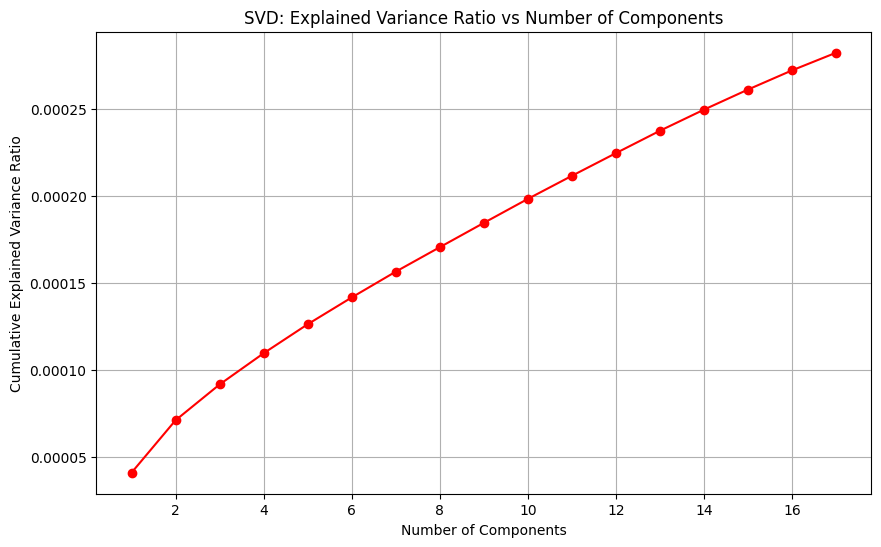


SVD Results:
Original feature dimension: 21
Reduced feature dimension: 17
Total explained variance ratio: 0.0003

Comparison of reduced dimensions:
SVD shape: (3432, 17)
PCA shape: (3432, 21)


In [41]:
# Implement SVD from scratch
class SVD:
    def __init__(self, n_components):
        self.n_components = n_components
        self.U = None
        self.singular_values = None 
        self.V = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        
        # Calculate covariance matrix
        cov_matrix = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)
        
        # Get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        
        # Sort eigenvalues and eigenvectors in descending order
        idx = eigenvalues.argsort()[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]
        
        # Calculate singular values
        self.singular_values = np.sqrt(eigenvalues[:self.n_components])
        
        # Calculate U matrix
        self.U = np.dot(X_centered, eigenvectors) / np.sqrt(eigenvalues)
        self.U = self.U[:, :self.n_components]
        
        # Keep only k components of V
        self.V = eigenvectors[:, :self.n_components]
        
        return self
        
    def transform(self, X):
        # Center the data using mean from fit
        X_centered = X - self.mean
        
        # Transform data
        X_reduced = np.dot(X_centered, self.V)
        
        return X_reduced
        
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# Apply SVD reduction
svd = SVD(n_components=k)
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

# Calculate explained variance ratio for SVD
explained_variance_svd = (svd.singular_values ** 2) / (len(X_train) - 1)
total_variance_svd = np.sum(np.var(X_train - svd.mean, axis=0))
explained_variance_ratio_svd = explained_variance_svd / total_variance_svd

plt.figure(figsize=(10, 6))
plt.plot(range(1, k + 1), np.cumsum(explained_variance_ratio_svd), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('SVD: Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

print("\nSVD Results:")
print(f"Original feature dimension: {X_train.shape[1]}")
print(f"Reduced feature dimension: {X_train_svd.shape[1]}")
print(f"Total explained variance ratio: {np.sum(explained_variance_ratio_svd):.4f}")

# Compare with PCA results
print("\nComparison of reduced dimensions:")
print(f"SVD shape: {X_train_svd.shape}")
print(f"PCA shape: {X_train.shape}")



Highly correlated feature pairs (correlation > 0.8):
Features 11 and 13: correlation = 0.909
Features 11 and 20: correlation = 0.908
Features 12 and 19: correlation = 0.994
Features 13 and 20: correlation = 0.999

Correlation Filter Results:
Original feature dimension: 21
Reduced feature dimension: 18
Number of features removed: 3

Comparison of reduced dimensions:
Correlation Filter shape: (3432, 18)
SVD shape: (3432, 17)
PCA shape: (3432, 21)


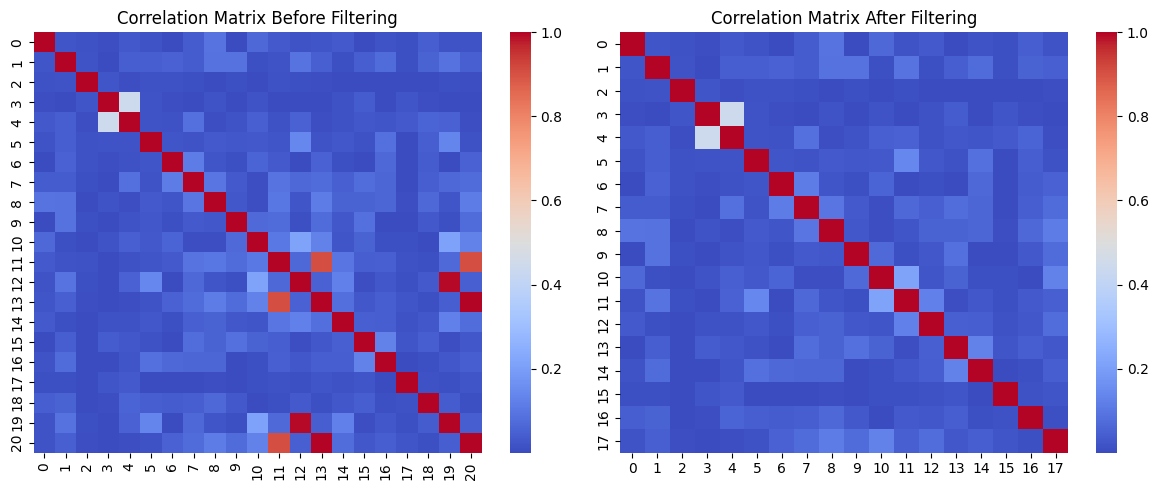

In [42]:
# Feature selection using correlation filter method
class CorrelationFilter:
    def __init__(self, threshold=0.8):
        self.threshold = threshold
        self.keep_mask = None
        
    def fit_transform(self, X):
        # Calculate correlation matrix
        corr_matrix = np.abs(np.corrcoef(X.T))
        
        # Get upper triangle indices (excluding diagonal)
        upper_tri = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
        
        # Find features with correlation greater than threshold
        high_corr_pairs = np.where(np.abs(corr_matrix[upper_tri]) > self.threshold)
        
        # Convert to original matrix indices and store correlated pairs
        correlated_pairs = []
        upper_tri_coords = np.triu_indices(corr_matrix.shape[0], k=1)
        for idx in range(len(high_corr_pairs[0])):
            i = upper_tri_coords[0][high_corr_pairs[0][idx]]
            j = upper_tri_coords[1][high_corr_pairs[0][idx]]
            correlation = corr_matrix[i,j]
            correlated_pairs.append((i, j, correlation))
        
        # Print highly correlated feature pairs
        print("\nHighly correlated feature pairs (correlation > {}):".format(self.threshold))
        for i, j, corr in correlated_pairs:
            print(f"Features {i} and {j}: correlation = {corr:.3f}")
        
        # For each group of correlated features, keep only one feature
        features_to_remove = set()
        processed_features = set()
        
        for i, j, _ in correlated_pairs:
            if i not in processed_features and j not in processed_features:
                # Keep feature i, remove feature j
                features_to_remove.add(j)
                processed_features.add(i)
                processed_features.add(j)
            elif i not in processed_features:
                features_to_remove.add(j)
                processed_features.add(i)
                processed_features.add(j)
            elif j not in processed_features:
                features_to_remove.add(i)
                processed_features.add(i)
                processed_features.add(j)
        
        # Create mask for features to keep
        self.keep_mask = np.ones(X.shape[1], dtype=bool)
        self.keep_mask[list(features_to_remove)] = False
        
        # Return filtered data
        return X[:, self.keep_mask]
        
    def transform(self, X):
        return X[:, self.keep_mask]

# Apply correlation filter to training data
# Initialize and apply correlation filter
corr_filter = CorrelationFilter(threshold=0.8)
X_train_corr = corr_filter.fit_transform(X_train)
X_test_corr = corr_filter.transform(X_test)

print("\nCorrelation Filter Results:")
print(f"Original feature dimension: {X_train.shape[1]}")
print(f"Reduced feature dimension: {X_train_corr.shape[1]}")
print(f"Number of features removed: {X_train.shape[1] - X_train_corr.shape[1]}")

# Compare dimensions with other reduction methods
print("\nComparison of reduced dimensions:")
print(f"Correlation Filter shape: {X_train_corr.shape}")
print(f"SVD shape: {X_train_svd.shape}")
print(f"PCA shape: {X_train.shape}")

# Visualize correlation matrix before and after filtering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(np.abs(np.corrcoef(X_train.T)), cmap='coolwarm')
plt.title('Correlation Matrix Before Filtering')

plt.subplot(1, 2, 2)
sns.heatmap(np.abs(np.corrcoef(X_train_corr.T)), cmap='coolwarm')
plt.title('Correlation Matrix After Filtering')

plt.tight_layout()
plt.show()
